
=== Classification Report ===

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294


=== Confusion Matrix ===

[[242   5]
 [ 41   6]]

=== Accuracy Score ===
0.8435374149659864


<ipython-input-2-02ecd25cac9e>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=feature_names[indices][:15], palette='coolwarm')


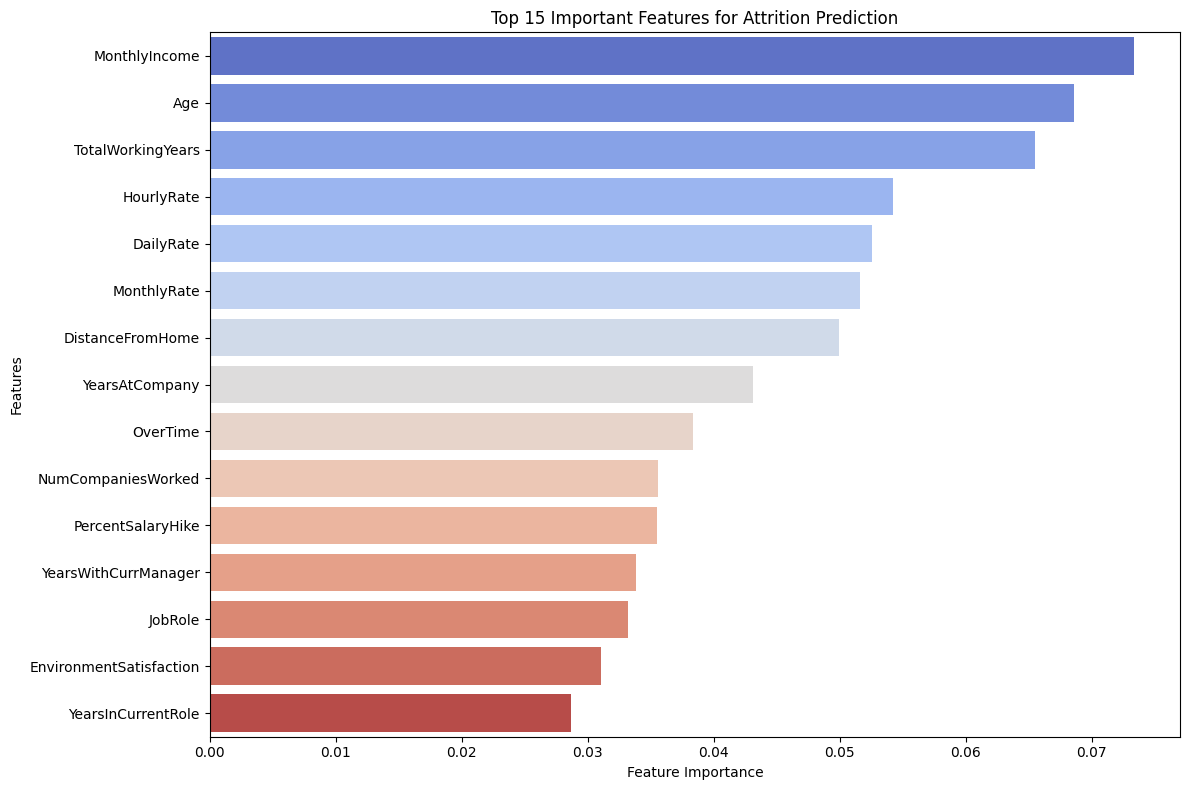

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Drop irrelevant columns
df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)

# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders if needed later

# Define features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
print("\n=== Classification Report ===\n")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===\n")
print(confusion_matrix(y_test, y_pred))

print("\n=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))

# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot top 15 important features
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices][:15], y=feature_names[indices][:15], palette='coolwarm')
plt.title("Top 15 Important Features for Attrition Prediction")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
